In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 671.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: msgpack
    Found exi

In [2]:
!pip install langchain langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 9.6 MB/s eta 0:00:00


## Set api key for OpenAI API

In [4]:
openai_api_key = <NAGA_AI_API_KEY>
# Set custom base URL for OpenAI API
custom_base_url = "https://api.naga.ac/v1"

# Declare Model

In [5]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini",temperature=0, openai_api_key=openai_api_key, base_url=custom_base_url)

response = model.invoke('Hey there')

print("Model Response with custom base URL:", response)


Model Response with custom base URL: content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-98da2273-4967-44af-aedd-9803cdb44a5f-0' usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {}, 'output_token_details': {'reasoning': 0}}


## Declare agent state

In [6]:
import requests
AgentState = {}

AgentState["messages"] = []


## Replace with your spoonacular API Key

In [7]:
api_key = ''  # Replace with your actual Spoonacular API key

## Define nodes for langraph

Function1 - extracts ingredients from the user query 

Function2 - calls spoonacular api to get recipe

Function3 - returns the output of function1 in friendly way

In [8]:

# Function 1: Extract the ingredients from user input
def function_1(state):
    messages = state['messages']
    user_input = messages[-1]
    complete_query = "Your task is to provide only the ingredients mentioned in the user query. \
                    Nothing more, just the ingredients. Following is the user query: " + user_input
    response = model.invoke(complete_query)  # Langchain model or OpenAI call
    state['messages'].append(response.content)  # append AIMessage response to AgentState
    return state

import requests

# Function 2: Fetch recipe and display in cookbook format
def function_2(state):
    messages = state['messages']
    ingredients = messages[-1]  # Get the ingredients extracted from the previous step

    # Example: Call a recipe API like Spoonacular
    url = f"https://api.spoonacular.com/recipes/findByIngredients?ingredients={ingredients}&number=1&apiKey={api_key}"
    response = requests.get(url)

    if response.status_code == 200:
        recipe_data = response.json()
        if recipe_data:
            # Select the first recipe only
            recipe = recipe_data[0]
            recipe_id = recipe.get('id')

            # Fetch detailed information for the recipe
            details_url = f"https://api.spoonacular.com/recipes/{recipe_id}/information?apiKey={api_key}"
            details_response = requests.get(details_url)

            if details_response.status_code == 200:
                details_data = details_response.json()
                title = details_data.get('title', 'Unknown Title')
                image = details_data.get('image', 'No image available')
                ready_in_minutes = details_data.get('readyInMinutes', 'Unknown')
                servings = details_data.get('servings', 'Unknown')
                source_url = details_data.get('sourceUrl', 'No source available')

                # Extract step-by-step instructions in a cookbook format
                analyzed_instructions = details_data.get('analyzedInstructions', [])
                steps = []
                if analyzed_instructions:
                    for instruction in analyzed_instructions:
                        for step in instruction.get('steps', []):
                            steps.append(f"Step {step['number']}: {step['step']}")

                if not steps:
                    steps.append("No instructions available")

                # Format the recipe information
                recipe_info = (
                    f"**Recipe:** {title}\n"
                    f"**Image:** {image}\n"
                    f"**Ready in:** {ready_in_minutes} minutes\n"
                    f"**Servings:** {servings}\n"
                    f"**Source:** {source_url}\n\n"
                    "**Step-by-Step Instructions:**\n"
                    + "\n".join(steps)
                )
            else:
                recipe_info = "Error fetching detailed recipe information."
        else:
            recipe_info = "No recipe found for the given ingredients."
    else:
        recipe_info = "Error fetching the recipe."

    state['messages'].append(recipe_info)
    return state

# Function 3: Format the output for the user
def function_3(state):
    messages = state['messages']
    user_input = messages[0]  # Initial user query
    available_info = messages[-1]  # Recipe fetched from API

    agent2_query = f"Your task is to format the recipe in a user-friendly way based on the user query: {user_input} \
                    Available recipe: {available_info}"
    response = model.invoke(agent2_query)  # Formatting response from the model (Langchain or OpenAI)

    return response.content


## Define Langraph Workflow

In [9]:
from langgraph.graph import Graph

workflow = Graph()

# Adding nodes for each function
workflow.add_node("extract_ingredients", function_1)
workflow.add_node("fetch_recipe", function_2)
workflow.add_node("format_response", function_3)

# Define the edges between the nodes
workflow.add_edge('extract_ingredients', 'fetch_recipe')
workflow.add_edge('fetch_recipe', 'format_response')

# Define entry and finish points
workflow.set_entry_point("extract_ingredients")
workflow.set_finish_point("format_response")

# Compile the app workflow
app = workflow.compile()

## Visualize the graph

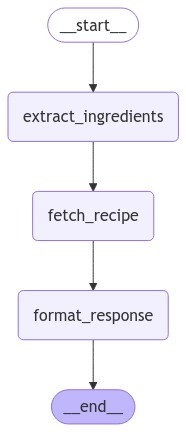

In [10]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

## Sample outputs:

In [11]:
# User input for testing the app (e.g., user asking for a recipe)
inputs = {"messages": ["I have tomatoes and pasta. Can you suggest a recipe?"]}

In [12]:
# Invoke the app and get the response
output = app.invoke(inputs)

# Print the formatted response
print(output)

### Penne Arrabiata Recipe

![Penne Arrabiata](https://img.spoonacular.com/recipes/655573-556x370.jpg)

**Ready in:** 45 minutes  
**Servings:** 4  
**Source:** [Foodista](https://www.foodista.com/recipe/2Y82DVJR/penne-arrabiata)

---

#### Ingredients:
- 1 teaspoon dried red pepper
- 3 tablespoons olive oil
- 5 cloves fresh garlic, minced
- 2 tablespoons fresh Italian parsley, minced
- 1 can (about 14 oz) chopped tomatoes (Pomi tomatoes recommended)
- Salt (for boiling water)
- 12 oz penne pasta
- Fresh basil (for garnish)

---

#### Step-by-Step Instructions:

1. **Boil Water:** Bring a large pot of salted water to a boil.
   
2. **Sauté Ingredients:** In a pan, sauté 1 teaspoon of dried red pepper in 3 tablespoons of olive oil.

3. **Add Garlic and Parsley:** Once the oil is hot (but not smoking), add 5 cloves of minced garlic and 2 tablespoons of minced fresh Italian parsley. Sauté until fragrant.

4. **Add Tomatoes:** Stir in 1 can of chopped tomatoes. Cover and cook until the sau

In [13]:
# Streaming response example
input_message = 'I have tomatoes and pasta. Can you suggest a recipe?'
for output in app.stream({"messages": [input_message]}):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'extract_ingredients':
---
{'messages': ['I have tomatoes and pasta. Can you suggest a recipe?', 'Tomatoes, pasta.']}

---

Output from node 'fetch_recipe':
---
{'messages': ['I have tomatoes and pasta. Can you suggest a recipe?', 'Tomatoes, pasta.', '**Recipe:** Penne Arrabiata\n**Image:** https://img.spoonacular.com/recipes/655573-556x370.jpg\n**Ready in:** 45 minutes\n**Servings:** 4\n**Source:** https://www.foodista.com/recipe/2Y82DVJR/penne-arrabiata\n\n**Step-by-Step Instructions:**\nStep 1: Bring a large pot of water to a boil.\nStep 2: Saute about 1 teaspoon of dried red pepper in a 3 tbsp. olive oil.\nStep 3: Add 5 cloves fresh minced garlic, 2 tbsp.Fresh Italian parsley, minced.When these ingredients are not, but not smoking, add 1 can tomatoes, chopped. (I like Pomi tomatoes which comes in a box). Stir, cover and cook untilthe sauce i heated. Cook the Penne in salted boiling water. Cook until al dante.\nStep 4: Drain and add to sauce.\nStep 5: Mix throughly 

## The above agent gives error if ingredients are not present in the input.
# To make agent dynamic following changes must be done

In [15]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

In [16]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

## To make AI respond to other messages too

By defining fetch_recipe_tools as tool
And adding a conditional node

In [17]:
import json
from langchain.tools import BaseTool
import requests
from langchain_core.messages import FunctionMessage
from langgraph.prebuilt import ToolInvocation, ToolExecutor
from langgraph.graph import StateGraph, END

from langchain.tools import BaseTool
import requests

# Define your FetchRecipeTool similar to other tools
class FetchRecipeTool(BaseTool):
    name: str = "fetch_recipe_tool"  
    description: str = "Fetch a recipe based on provided ingredients and return in cookbook format."  # Add type annotation

    def _run(self, ingredients: str) -> str:
        url = f"https://api.spoonacular.com/recipes/findByIngredients?ingredients={ingredients}&number=1&apiKey={api_key}"
        response = requests.get(url)

        if response.status_code == 200:
            recipe_data = response.json()
            if recipe_data:
                recipe = recipe_data[0]
                recipe_id = recipe.get('id')
                details_url = f"https://api.spoonacular.com/recipes/{recipe_id}/information?apiKey={api_key}"
                details_response = requests.get(details_url)

                if details_response.status_code == 200:
                    details_data = details_response.json()
                    title = details_data.get('title', 'Unknown Title')
                    image = details_data.get('image', 'No image available')
                    ready_in_minutes = details_data.get('readyInMinutes', 'Unknown')
                    servings = details_data.get('servings', 'Unknown')
                    source_url = details_data.get('sourceUrl', 'No source available')

                    # Extract step-by-step instructions in a cookbook format
                    analyzed_instructions = details_data.get('analyzedInstructions', [])
                    steps = []
                    if analyzed_instructions:
                        for instruction in analyzed_instructions:
                            for step in instruction.get('steps', []):
                                steps.append(f"Step {step['number']}: {step['step']}")

                    if not steps:
                        steps.append("No instructions available")

                    # Format the recipe information
                    recipe_info = (
                        f"**Recipe:** {title}\n"
                        f"**Image:** {image}\n"
                        f"**Ready in:** {ready_in_minutes} minutes\n"
                        f"**Servings:** {servings}\n"
                        f"**Source:** {source_url}\n\n"
                        "**Step-by-Step Instructions:**\n"
                        + "\n".join(steps)
                    )
                else:
                    recipe_info = "Error fetching detailed recipe information."
            else:
                recipe_info = "No recipe found for the given ingredients."
        else:
            recipe_info = "Error fetching the recipe."

        return recipe_info

    def _arun(self, ingredients: str) -> str:
        raise NotImplementedError("Async method not implemented.")


# Initialize the tool executor with your custom tool
tools = [FetchRecipeTool()]
tool_executor = ToolExecutor(tools)

# Define function_1 for handling message processing with the agent
def function_1(state):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

# Define function_2 for invoking the recipe tool
def function_2(state):
    messages = state['messages']
    last_message = messages[-1]  

    # Parse the tool input from the function call
    parsed_tool_input = json.loads(last_message.additional_kwargs["function_call"]["arguments"])

    # Construct a ToolInvocation from the function_call and pass in the tool name and expected input
    action = ToolInvocation(
        tool=last_message.additional_kwargs["function_call"]["name"],
        tool_input=parsed_tool_input['__arg1'],
    )

    # Invoke the tool executor to get a response
    response = tool_executor.invoke(action)

    # Create a FunctionMessage based on the response
    function_message = FunctionMessage(content=str(response), name=action.tool)

    # Return a list of messages
    return {"messages": [function_message]}

# Define where_to_go for conditional execution
def where_to_go(state):
    messages = state['messages']
    last_message = messages[-1]

    # Check if "function_call" is present in the last message
    if "function_call" in last_message.additional_kwargs:
        return "continue"
    else:
        return "end"

# Set up the workflow using StateGraph
workflow = StateGraph(AgentState)

# Add nodes for agent and tool function execution
workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)

# Add conditional edges based on where_to_go
workflow.add_conditional_edges(
    "agent",
    where_to_go, {
        "continue": "tool",
        "end": END
    }
)

# Add an edge for calling the agent after the tool
workflow.add_edge('tool', 'agent')

# Set the entry point of the workflow
workflow.set_entry_point("agent")

app = workflow.compile()


<ipython-input-17-2f05da2ab528>:72: LangGraphDeprecationWarning: ToolExecutor is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  tool_executor = ToolExecutor(tools)


## Visualize the graph

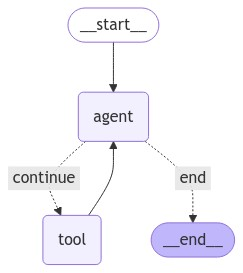

In [18]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

#### Sample response with input not being

In [19]:
from langchain_core.messages import HumanMessage

inputs = {"messages": [HumanMessage(content="Hello")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-abd0c326-847f-4f83-9d37-81dfd01ba74b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {}, 'output_token_details': {'reasoning': 0}})]}

In [20]:
inputs = {"messages": [HumanMessage(content="I have tomatoes and pasta. Can you suggest a recipe?")]}
for output in app.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
{'messages': [AIMessage(content='Absolutely! Here’s a simple and delicious recipe for **Tomato Pasta** that you can make with just tomatoes and pasta, along with a few common pantry ingredients.\n\n### Tomato Pasta Recipe\n\n#### Ingredients:\n- 8 oz (about 225g) pasta (spaghetti, penne, or your choice)\n- 4-5 ripe tomatoes (or a can of diced tomatoes)\n- 2-3 cloves garlic, minced\n- 2 tablespoons olive oil\n- Salt and pepper to taste\n- Fresh basil or parsley (optional, for garnish)\n- Grated Parmesan cheese (optional)\n\n#### Instructions:\n\n1. **Cook the Pasta:**\n   - Bring a large pot of salted water to a boil. Add the pasta and cook according to package instructions until al dente. Reserve about 1 cup of pasta water, then drain the pasta.\n\n2. **Prepare the Tomato Sauce:**\n   - While the pasta is cooking, chop the fresh tomatoes (if using fresh) or open the can of diced tomatoes.\n   - In a large skillet, heat the olive oil over medium heat. Add t

## Another method

In [21]:
import json
from langchain.tools import BaseTool
import requests
from langchain_core.messages import FunctionMessage
from langgraph.prebuilt import ToolInvocation, ToolExecutor
from langgraph.graph import StateGraph, END
import re

# Define your FetchRecipeTool
class FetchRecipeTool(BaseTool):
    name: str = "fetch_recipe_tool"
    description: str = "Fetch a recipe based on provided ingredients and return in cookbook format."

    def _run(self, ingredients: str) -> str:
        url = f"https://api.spoonacular.com/recipes/findByIngredients?ingredients={ingredients}&number=1&apiKey={api_key}"
        response = requests.get(url)

        if response.status_code == 200:
            recipe_data = response.json()
            if recipe_data:
                recipe = recipe_data[0]
                recipe_id = recipe.get('id')
                details_url = f"https://api.spoonacular.com/recipes/{recipe_id}/information?apiKey={api_key}"
                details_response = requests.get(details_url)

                if details_response.status_code == 200:
                    details_data = details_response.json()
                    title = details_data.get('title', 'Unknown Title')
                    image = details_data.get('image', 'No image available')
                    ready_in_minutes = details_data.get('readyInMinutes', 'Unknown')
                    servings = details_data.get('servings', 'Unknown')
                    source_url = details_data.get('sourceUrl', 'No source available')

                    # Extract step-by-step instructions in a cookbook format
                    analyzed_instructions = details_data.get('analyzedInstructions', [])
                    steps = []
                    if analyzed_instructions:
                        for instruction in analyzed_instructions:
                            for step in instruction.get('steps', []):
                                steps.append(f"Step {step['number']}: {step['step']}")

                    if not steps:
                        steps.append("No instructions available")

                    # Format the recipe information
                    recipe_info = (
                        f"**Recipe:** {title}\n"
                        f"**Image:** {image}\n"
                        f"**Ready in:** {ready_in_minutes} minutes\n"
                        f"**Servings:** {servings}\n"
                        f"**Source:** {source_url}\n\n"
                        "**Step-by-Step Instructions:**\n"
                        + "\n".join(steps)
                    )
                else:
                    recipe_info = "Error fetching detailed recipe information."
            else:
                recipe_info = "No recipe found for the given ingredients."
        else:
            recipe_info = "Error fetching the recipe."

        return recipe_info

    def _arun(self, ingredients: str) -> str:
        raise NotImplementedError("Async method not implemented.")


# Initialize the tool executor with your custom tool
tools = [FetchRecipeTool()]
tool_executor = ToolExecutor(tools)





<ipython-input-21-9dafc9f747d7>:70: LangGraphDeprecationWarning: ToolExecutor is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  tool_executor = ToolExecutor(tools)


In [22]:
import re
from langchain_core.messages import HumanMessage
from langchain_core.messages import FunctionMessage
from langgraph.prebuilt import ToolNode

# Step 1: Define a function to extract ingredients from the input
def extract_ingredients(message_content):
    # Example pattern 
    ingredients_pattern = r"\b(?:tomato|onion|garlic|potato|chicken|rice|carrot|pepper|salt|sugar|egg|milk|cheese|butter|flour|oil)\b"
    matches = re.findall(ingredients_pattern, message_content, flags=re.IGNORECASE)

    if matches:
        return ', '.join(set(matches))  # Return a comma-separated list of unique ingredients
    return None

# Step 2: Define the reasoning function to analyze the initial state and extract ingredients
def reasoning_function(state):
    messages = state['messages']
    last_message = messages[-1]  
    if isinstance(last_message, HumanMessage):
        last_message_content = last_message.content
    else:
        last_message_content = ""

    ingredients = extract_ingredients(last_message_content)
    if ingredients:

        return {"messages": [HumanMessage(content=f"Ingredients found: {ingredients}. Fetching a recipe for you...")], "ingredients": ingredients, "type": "extracted"}
    else:
        return {"messages": [HumanMessage(content="No ingredients found. Proceeding with general response...")], "type": "general_query"}

# Step 3: Define function_1 for handling general AI responses
def function_1(state):
    messages = state['messages']
    response = model.invoke(messages) 
    return {"messages": [response]}

# Step 4: Define function_2 for invoking the recipe tool
def function_2(state):
    ingredients = state.get('ingredients')  

    if ingredients:

        tool_node = ToolNode(tool="fetch_recipe_tool", tool_input=ingredients)


        response = tool_executor.invoke(tool_node)


        function_message = FunctionMessage(content=str(response), name=tool_node.tool)

        return {"messages": [function_message]}

# Step 5: Define where_to_go to decide between tool usage and normal response
def where_to_go(state):
    if state.get("type") == "extracted":
        return "tool"
    else:
        return "agent"

workflow = StateGraph(AgentState)

workflow.add_node("reasoning", reasoning_function)
workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)

workflow.add_conditional_edges(
    "reasoning",
    where_to_go, {
        "tool": "tool",
        "agent": "agent"
    }
)


workflow.add_edge('tool', 'agent')

workflow.set_entry_point("reasoning")

app = workflow.compile()

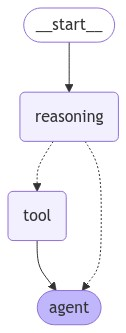

In [23]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

#### Sample responses

In [24]:
from langchain_core.messages import HumanMessage

inputs = {"messages": [HumanMessage(content="I have tomatoes, onions, and chicken. Can you suggest a recipe?")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='I have tomatoes, onions, and chicken. Can you suggest a recipe?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Ingredients found: chicken. Fetching a recipe for you...', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Sure! Here’s a simple and delicious recipe for **Chicken with Tomatoes and Onions**:\n\n### Ingredients:\n- 2 chicken breasts (or thighs)\n- 2 medium tomatoes, diced\n- 1 large onion, sliced\n- 2-3 cloves of garlic, minced (optional)\n- 2 tablespoons olive oil\n- Salt and pepper to taste\n- 1 teaspoon dried oregano (or Italian seasoning)\n- Fresh basil or parsley for garnish (optional)\n\n### Instructions:\n\n1. **Prepare the Chicken**: Season the chicken breasts with salt, pepper, and oregano on both sides.\n\n2. **Sauté the Onions**: In a large skillet, heat the olive oil over medium heat. Add the sliced onions and cook until they are soft and translucent, about 5-7 minutes. If using garlic, a

In [25]:
inputs = {"messages": [HumanMessage(content="Hello")]}
app.invoke(inputs)

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='No ingredients found. Proceeding with general response...', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 22, 'total_tokens': 31, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-1d89dff2-94d5-458b-897f-63630623e012-0', usage_metadata={'input_tokens': 22, 'output_tokens': 9, 'total_tokens': 31, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}